In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import os

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
sns.set_context('talk')


In [31]:
from utils import get_data

df = get_data()
df.head()

number of subjects found: 64


choice    n1   n2  prob1  prob2  \
subject session format       trial_nr                                    
13      1       non-symbolic 1          False  16.0  7.0   0.55   0.55   
                             2           True   7.0  5.0   0.55   0.55   
                             3          False  14.0  7.0   0.55   0.55   
                             4           True   9.0  7.0   0.55   0.55   
                             6          False  14.0  7.0   0.55   0.55   

                                       risky_left  chose_risky  n_risky  \
subject session format       trial_nr                                     
13      1       non-symbolic 1               True         True     16.0   
                             2               True        False      7.0   
                             3               True         True     14.0   
                             4               True        False      9.0   
                             6               True         True     14.0   

                                       n_safe      frac  log(risky/safe)  \
subject session format       trial_nr                                      
13      1       non-symbolic 1            7.0  2.285714         0.826679   
                             2            5.0  1.400000         0.336472   
                             3            7.0  2.000000         0.693147   
                             4            7.0  1.285714         0.251314   
                             6            7.0  2.000000         0.693147   

                                        log(n1)    p1    p2  group  
subject session format       trial_nr                               
13      1       non-symbolic 1         2.772589  0.55  0.55      1  
                             2         1.945910  0.55  0.55      1  
                             3         2.639057  0.55  0.55      1  
                             4         2.197225  0.55  0.55      1  
                             6         2.639057  0.55  0.55      1

Text(0.5, 0.98, 'Control')

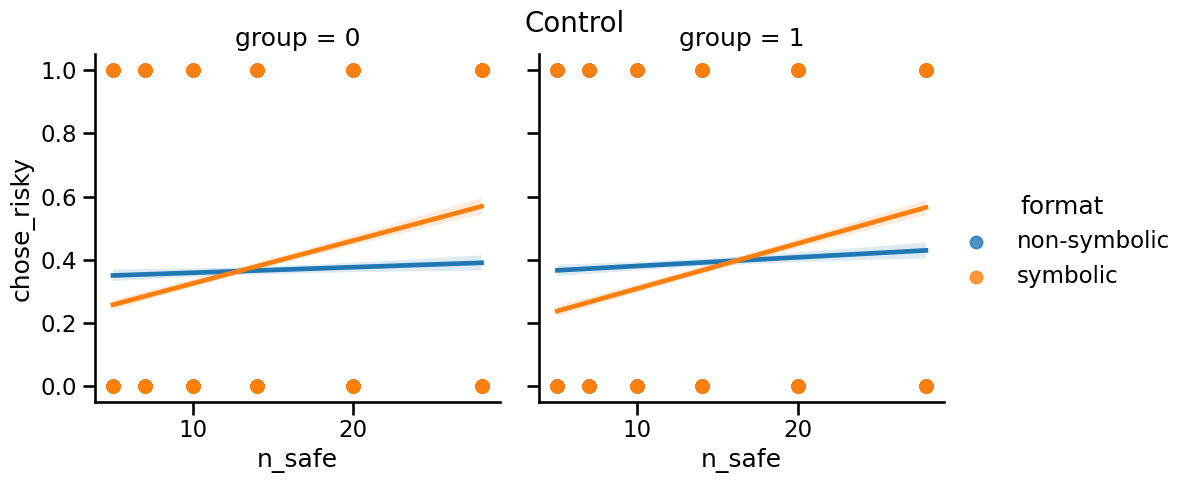

In [35]:
fig = sns.lmplot(df.reset_index(), x='n_safe', y='chose_risky', hue='format', col='group',ci=95)


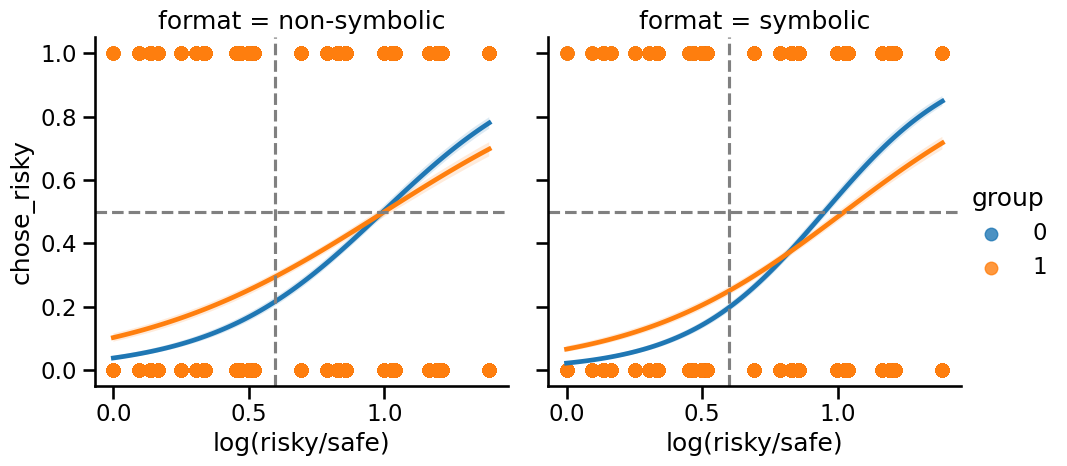

In [42]:
x_var = 'log(risky/safe)'
fig = sns.lmplot(df.reset_index(), x=x_var, y='chose_risky', hue= 'group', col='format',ci=95,  logistic=True)

for ax in fig.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')


Text(0.5, 0.98, 'Control')

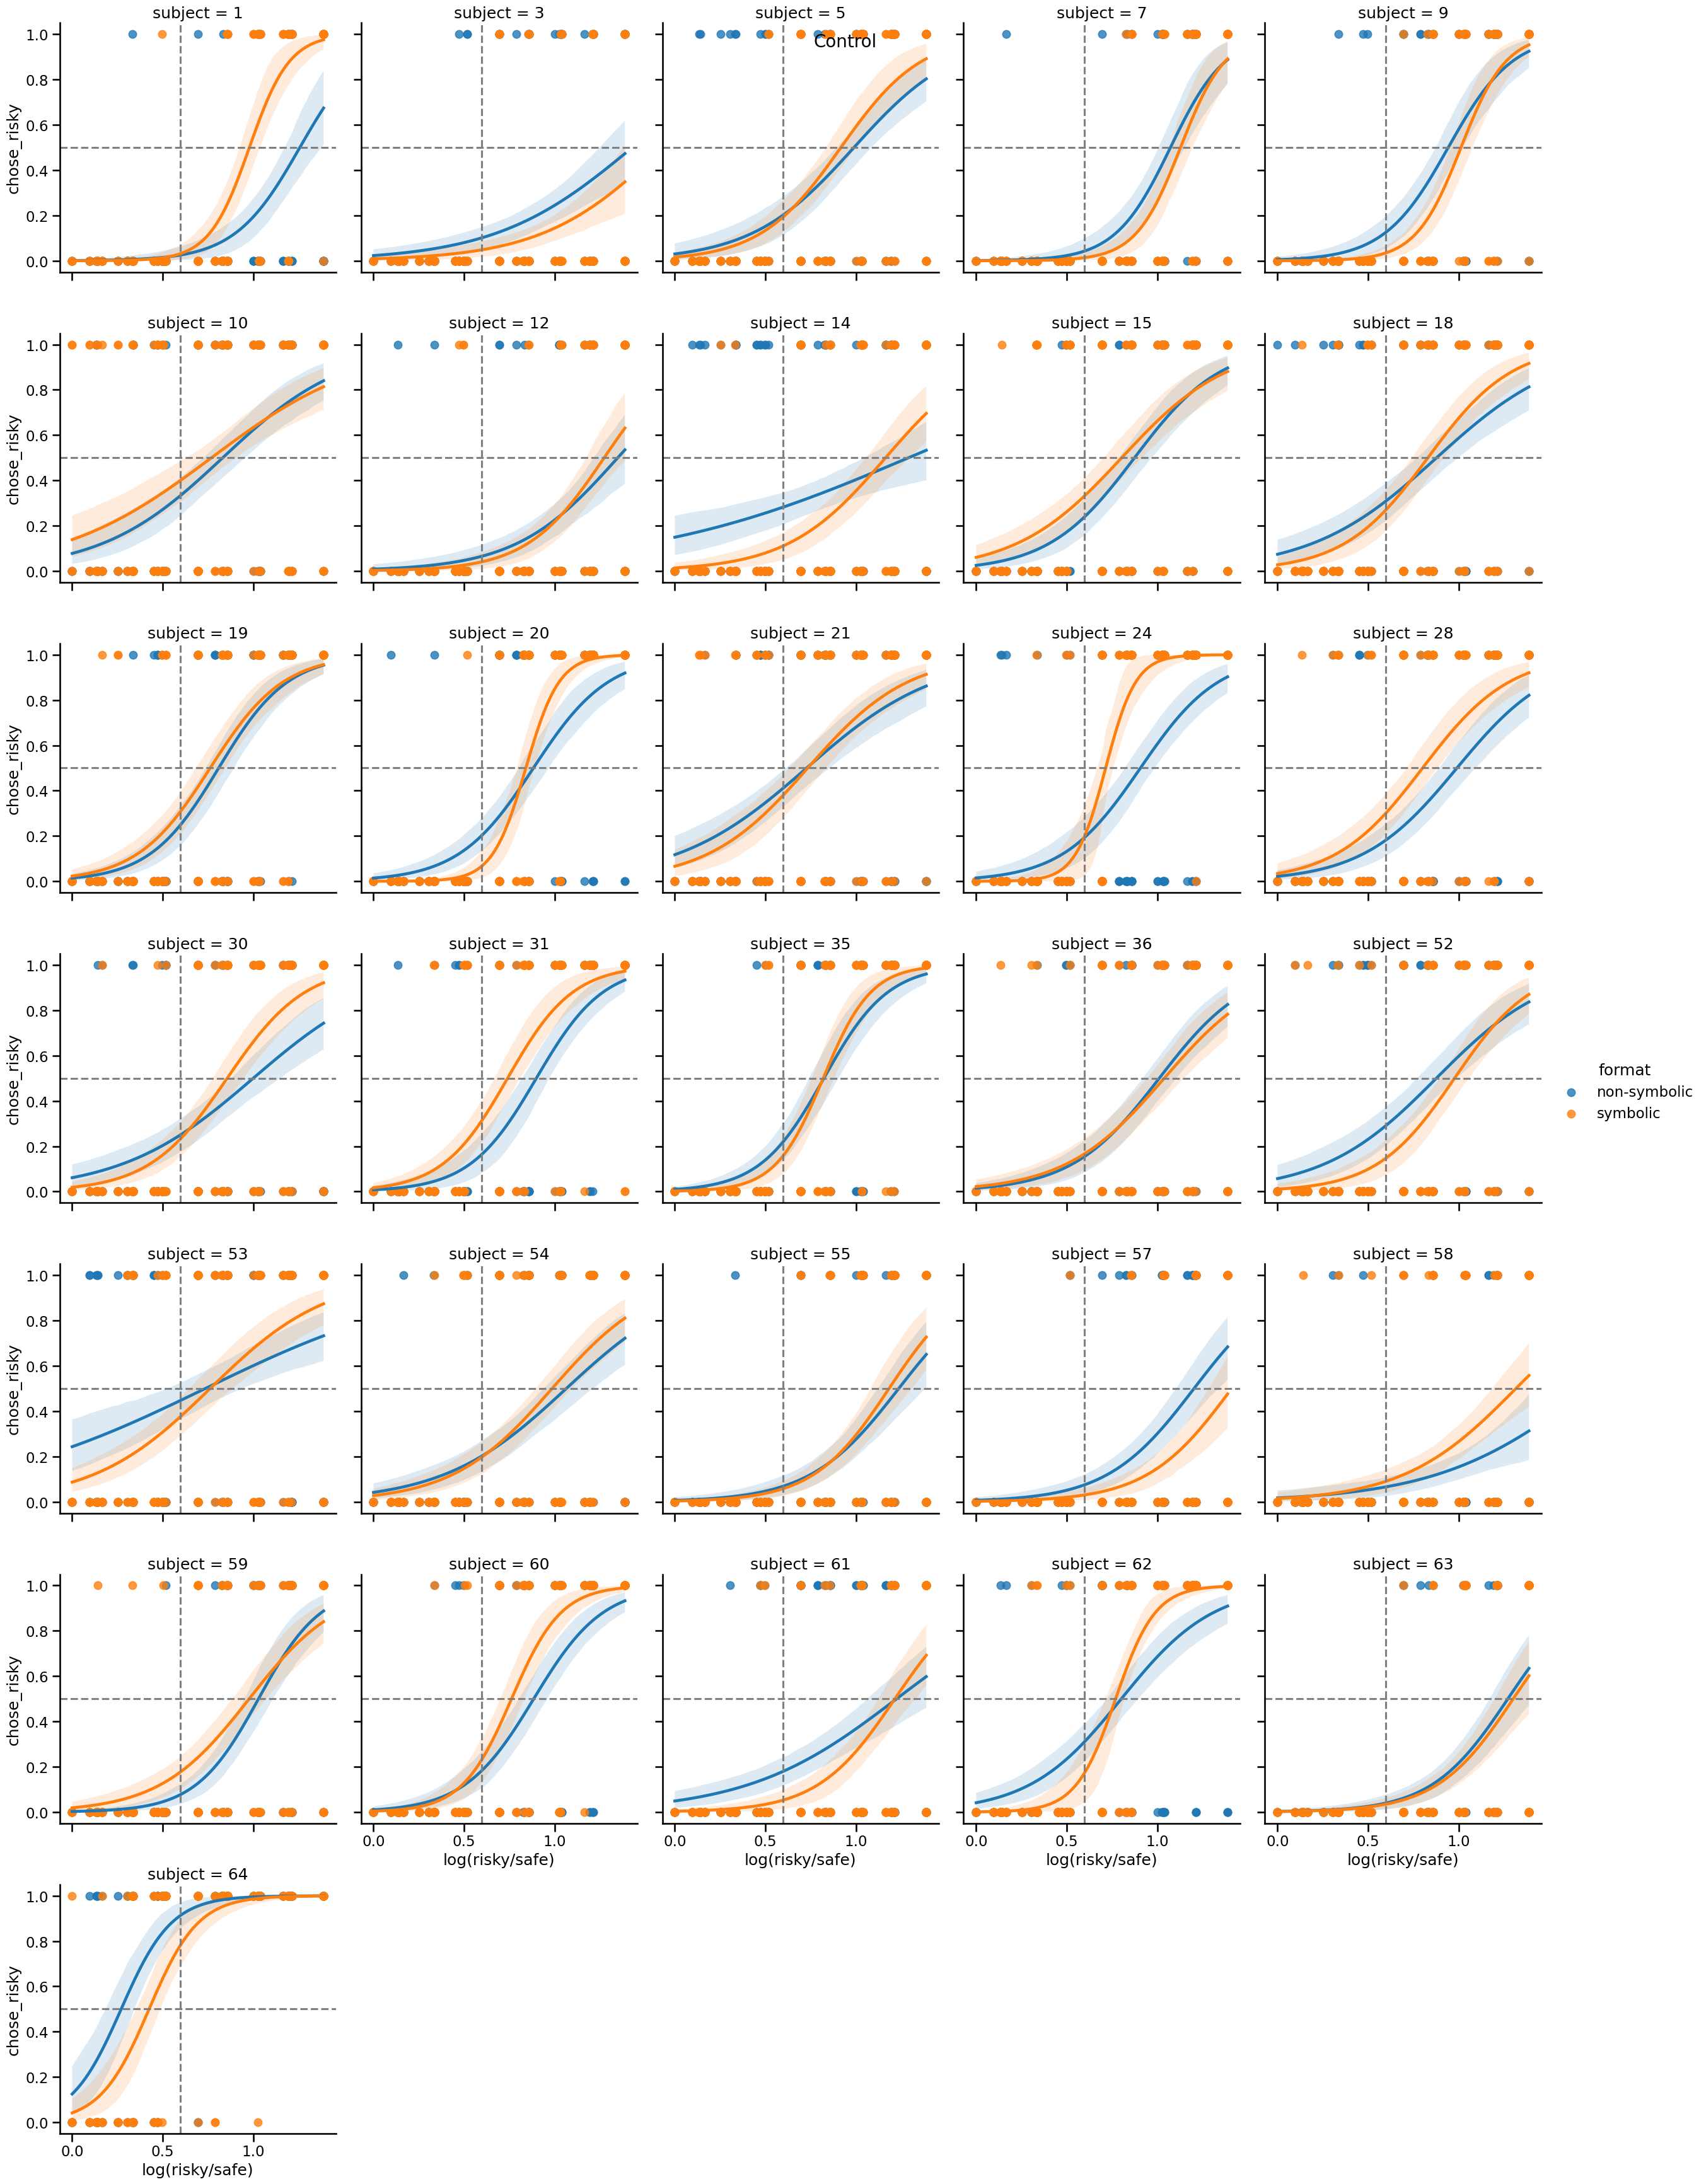

In [36]:
tmp = df[df['group']==0]
g = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_risky', hue='format', col='subject',ci=95,  logistic=True, col_wrap=5)

for ax in g.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')

g.fig.suptitle('Control', fontsize=20)


Text(0.5, 0.98, 'Dyscalculic')

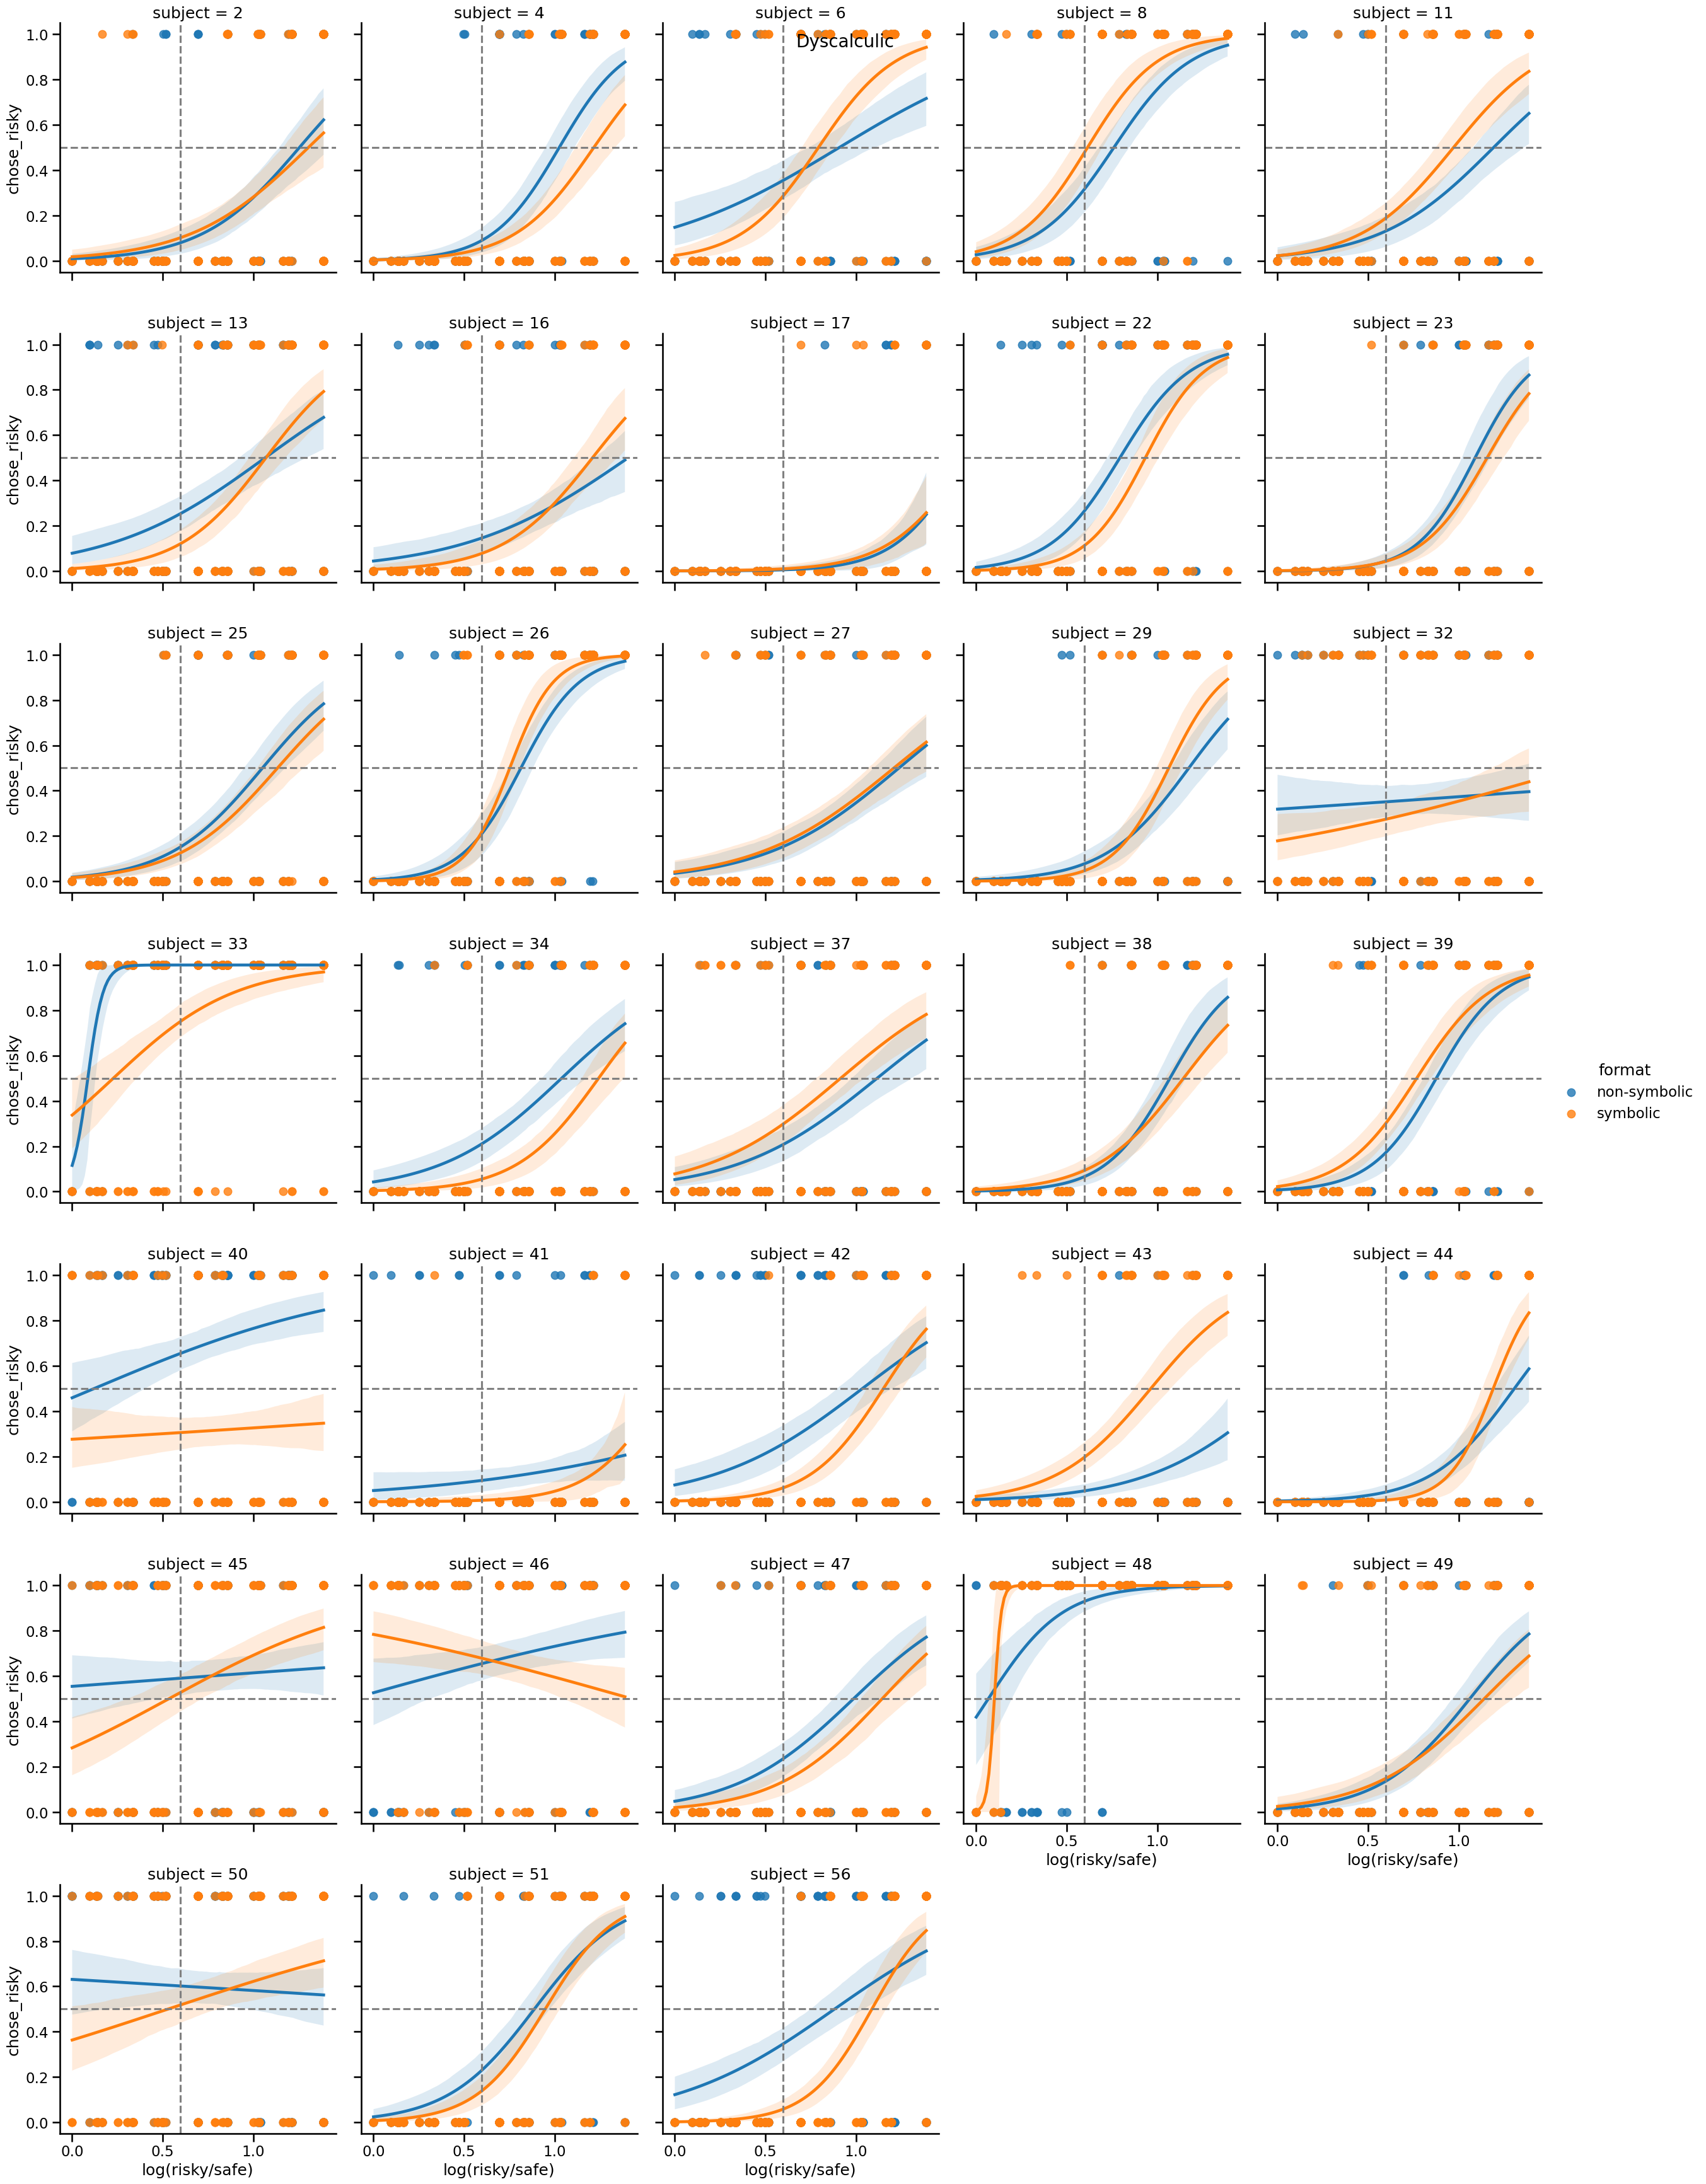

In [38]:
tmp = df[df['group']==1]
g = sns.lmplot(tmp.reset_index(), x=x_var, y='chose_risky', hue='format', col='subject',ci=95,  logistic=True, col_wrap=5)

for ax in g.axes.flat:
    ax.axvline(x=np.log(1/0.55),color='grey', ls='--')
    ax.axhline(y=0.5,color='grey', ls='--')

g.fig.suptitle('Dyscalculic', fontsize=20)